In [30]:
import numpy as np
import pandas as pd

from pandas import read_csv

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from IPython.core.display import HTML



import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import scipy

from scipy.stats.stats import spearmanr
from scipy.stats import chi2_contingency

%matplotlib inline

# Pearson correlation


**Assumptions**
- Data is normally distributed
- Continous and numeric variable
- Linearly related variables

R = 1 strongly correlated

R = 0 No correlation

R = -1 Strongly negative correlated

In [11]:
tips = sns.load_dataset("tips")

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


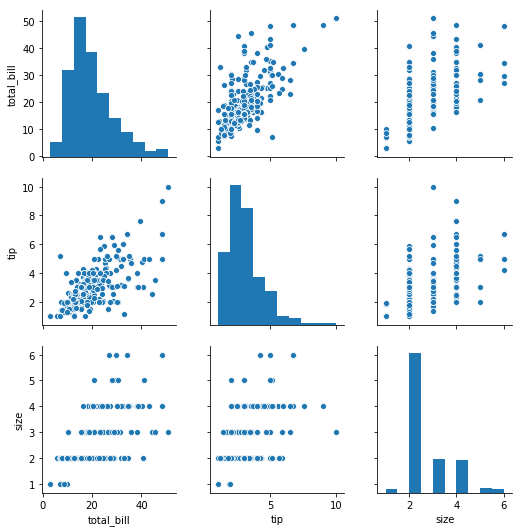

In [14]:
sns.pairplot(tips)

In [16]:
labelencoder = LabelEncoder()
tips['sex'] = labelencoder.fit_transform(tips['sex'])
tips['smoker'] = labelencoder.fit_transform(tips['smoker'])
tips['day'] = labelencoder.fit_transform(tips['day'])
tips['time'] = labelencoder.fit_transform(tips['time'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [17]:
X = tips[['sex', 'smoker', 'day','time']]

In [18]:
X.head()

,sex,smoker,day,time
0,0,0,2,0
1,1,0,2,0
2,1,0,2,0
3,1,0,2,0
4,0,0,2,0


- Non normal
- Chi square test for independence: Reject P_values less than 0.05 to connclude if variables are independent of each other

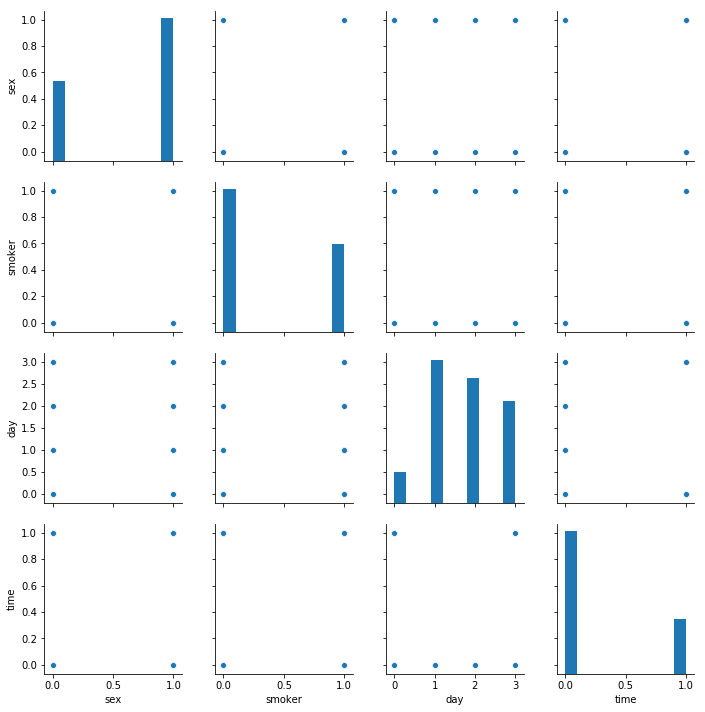

In [14]:
sns.pairplot(X)

# Spearman's rank 

**Assumptions**

- Multinomial
- Binomial
- data is non-normal
- Data is non-linearly related
- Ordinal values to be ranked as categorical labels

In [21]:
sex = X['sex']
smoker = X['smoker']
day = X['day']
time = X['time']

spearmanr_coefficient, p_value = spearmanr(smoker, sex)
print (spearmanr_coefficient)

0.0028159517337


In [22]:
spearmanr_coefficient, p_value = spearmanr(day, sex)
print (spearmanr_coefficient)

-0.0802687088831


In [23]:
spearmanr_coefficient, p_value = spearmanr(time, sex)
print (spearmanr_coefficient)

-0.205231296133


**Chi-test table test for independence**
- P < 0.05, variables are correlated, reject null hypothesis
- P > 0.05, variables are not correlated or independent, accept null hypothesis

In [31]:
df

('chi test:', 0.0087632905317735939)
('p_value:', 0.92541702049442298)


In [32]:
'reject value since p value < 0.05'
table = pd.crosstab(day, sex)
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi test:',chi2)
print('p_value:',p)


('chi test:', 13.222001372406609)
('p_value:', 0.0041803020928222571)


In [33]:
'reject value since p value < 0.05'
table = pd.crosstab(time, sex)
chi2, p, dof, expected = chi2_contingency(table.values)
print('chi test:',chi2)
print('p_value:',p)

('chi test:', 9.3438089829706232)
('p_value:', 0.002237400118075248)
